<a href="https://www.kaggle.com/code/udayanguha/titanic-first-submission?scriptVersionId=114717977" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
titanic = pd.read_csv('../input/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

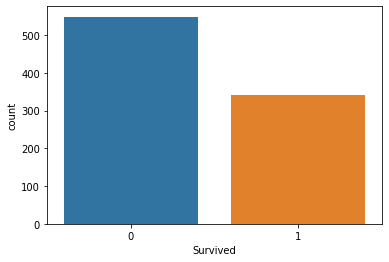

In [4]:
sns.countplot(x='Survived', data = titanic) 

Died > 500, Survived close to 300

<AxesSubplot:xlabel='Survived', ylabel='count'>

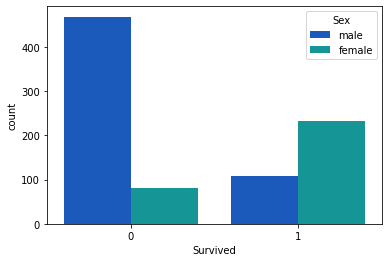

In [5]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic, palette = 'winter')

Women were more survivors. Men died more than 4 times than women.

<AxesSubplot:xlabel='Survived', ylabel='count'>

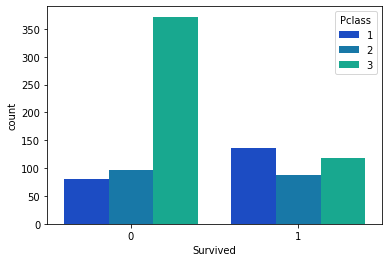

In [6]:
sns.countplot (x= 'Survived', hue = 'Pclass',data = titanic, palette = 'winter')

Based on passenger class, the passenger of class 3 died the most. Out of the survivors, class 1 passengers survived more than others


<AxesSubplot:ylabel='Frequency'>

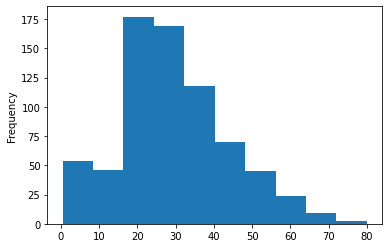

In [7]:
titanic['Age'].plot.hist()

Majority of travellers are within the age group of 20 - 40

<AxesSubplot:ylabel='Frequency'>

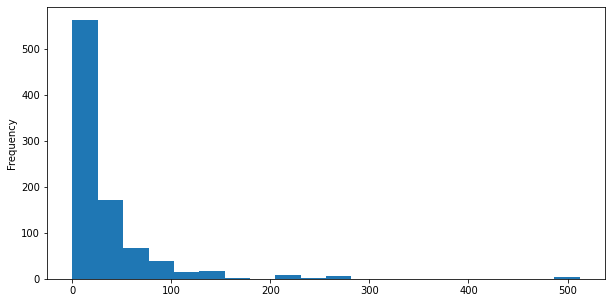

In [8]:
titanic['Fare'].plot.hist(bins=20, figsize=(10,5))

Most of passengers had purchased tickets whose cost was less than 100

<AxesSubplot:xlabel='SibSp', ylabel='count'>

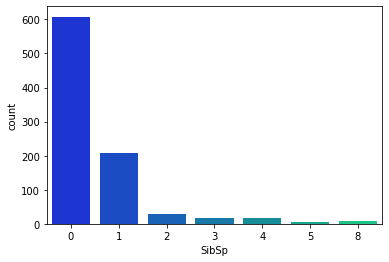

In [9]:
sns.countplot(x='SibSp', data=titanic, palette = 'winter')

Most of the passengers were travelling without sibling onboard


<AxesSubplot:ylabel='Frequency'>

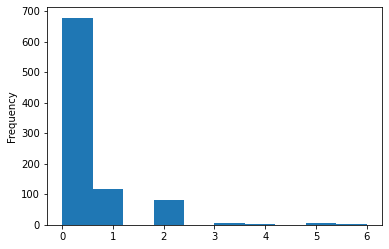

In [10]:
titanic['Parch'].plot.hist()

<AxesSubplot:xlabel='Parch', ylabel='count'>

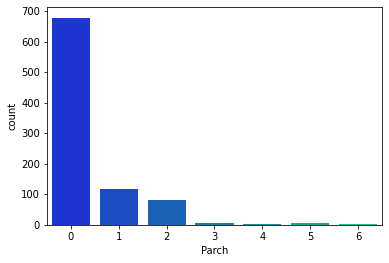

In [11]:
sns.countplot(x='Parch', data=titanic, palette='winter')

Parents and siblings were far less compared to solo passengers

**DATA CLEANING**

Null Check

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values present in 3 columns. Let us see the data using heatmap

<AxesSubplot:>

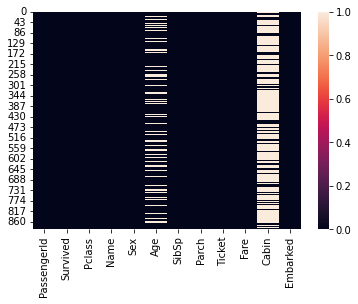

In [13]:
sns.heatmap(titanic.isnull() )

White colour shows the presence of nulls which need to cleaned

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

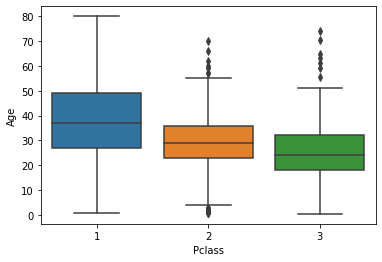

In [14]:
sns.boxplot(x='Pclass', y= 'Age', data = titanic)

Passenger Class 3 had youngest while elderly passengers were in Class 1

**FEATURE ENGINEERING**

Drop column "cabin" as it is not showing significant relationship to survival

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic.drop('Cabin',axis= 1, inplace=True)

In [17]:
titanic.dropna(inplace=True)

<AxesSubplot:>

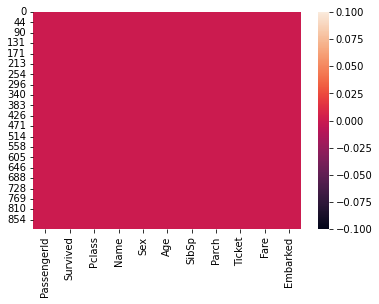

In [18]:
sns.heatmap(titanic.isnull() )

All null values have been removed from dataset

**MODEL BUILDING**

1. **One Hot Encoding**
Converting String column values to binary values to be used in computation. This process will convert the Categorical columns to binary values

In [19]:
pd.get_dummies(titanic['Sex']).head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [20]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head(3)

,male
0,1
1,0
2,0


Drop the column "female", as the Column "male" is enough to know the gender based on data

In [21]:
embark = pd.get_dummies(titanic['Embarked'],drop_first='True')

In [22]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


Drop first embarking spot to reduce the columns

In [23]:
Pcl = pd.get_dummies (titanic['Pclass'],drop_first='True')

In [24]:
Pcl.head(3)

,2,3
0,0,1
1,0,0
2,0,1


Passenger Class 1 has been dropped as other two passneger class are enough to interpret data

Now, data is totally having categorical values

In [25]:
titanic = pd.concat([titanic,sex, embark, Pcl],axis =1)

In [26]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


Dropping unncessary columns

In [27]:
titanic.drop(['PassengerId','Pclass','Name','Sex','Ticket','Fare','Embarked'], axis=1, inplace =True)

In [28]:
titanic.head(3)

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1


**MODEL TRAINING**

In [29]:
X=titanic.drop('Survived', axis =1)
y = titanic['Survived']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state = 10)

In [32]:
from  sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [33]:
lm.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression()

In [34]:
prediction = lm.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [35]:
from sklearn.metrics import classification_report

In [36]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.85       124\n           1       0.83      0.70      0.76        90\n\n    accuracy                           0.81       214\n   macro avg       0.82      0.80      0.80       214\nweighted avg       0.81      0.81      0.81       214\n'

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, prediction)

array([[111,  13],
       [ 27,  63]])

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,prediction)

0.8130841121495327

**CONCLUSION**

Ended up with accuracy of more than 80%  which is decent at first attempt.